<a href="https://colab.research.google.com/github/manasapjoshi/Data_Analysis_Projects/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Means _ K nearest Neighbor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('gene_expression.csv')
df.head()


,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

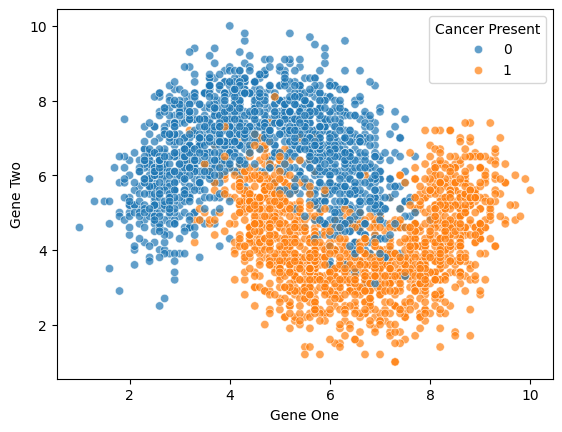

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

(3.0, 10.0)

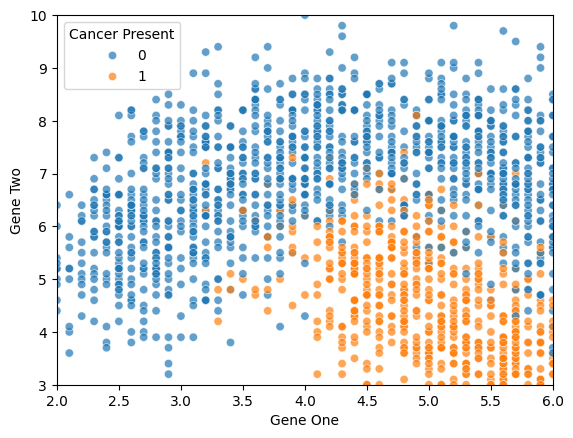

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)
plt.xlim(2,6)
plt.ylim(3,10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [ ]:
df.dtypes

,0
Gene One,float64
Gene Two,float64
Cancer Present,int64


In [ ]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


#training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df.drop('Cancer Present',axis=1) #axis use for columns
x.head()

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4


In [ ]:
y=df['Cancer Present']
y.head()

,Cancer Present
0,1
1,0
2,1
3,0
4,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
print('X Training',x_train.shape)
print('X Testing',x_test.shape)
print('Y Training',y_train.shape)
print('Y Testing',y_test.shape)

X Training (2100, 2)
X Testing (900, 2)
Y Training (2100,)
Y Testing (900,)


In [ ]:
#use scaling technique
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

In [ ]:
print('Scaled X Train',scaled_x_train)
print('Scaled X Test',scaled_x_test)

Scaled X Train [[ 0.91693262 -0.70989825]
 [ 0.31277553 -0.65189777]
 [-1.17015551  0.39211086]
 ...
 [ 0.09308204 -1.63790592]
 [ 1.46616633 -0.70989825]
 [-0.73076854  0.62411278]]
Scaled X Test [[-0.40122831  0.62411278]
 [-0.23645819 -1.17390208]
 [-0.95046203  0.97211565]
 ...
 [-0.07168808 -0.18789393]
 [-0.23645819  1.72612188]
 [-0.18153482 -2.04390927]]


In [ ]:
#apply KNN Classify
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier()

understanding knn and choosing k values

In [ ]:
full_test=pd.concat([x_test,y_test],axis=1)
full_test.head()

,Gene One,Gene Two,Cancer Present
45,4.8,6.5,1
668,5.1,3.4,1
1650,3.8,7.1,0
1247,2.9,5.3,0
18,8.5,5.6,1


In [ ]:
len(full_test)

900

<Axes: xlabel='Gene One', ylabel='Gene Two'>

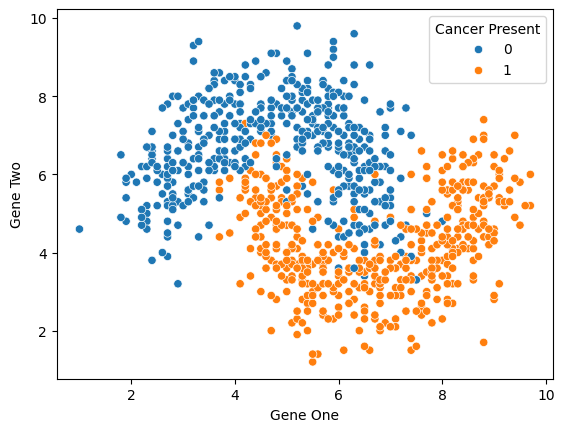

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=full_test)

In [ ]:
full_train=pd.concat([x_train,y_train],axis=1)
full_train.head()

,Gene One,Gene Two,Cancer Present
19,7.2,4.2,1
369,6.1,4.3,1
2165,3.4,6.1,0
1911,6.4,7.6,0
1295,5.1,3.7,1


In [ ]:
len(full_train)

2100

<Axes: xlabel='Gene One', ylabel='Gene Two'>

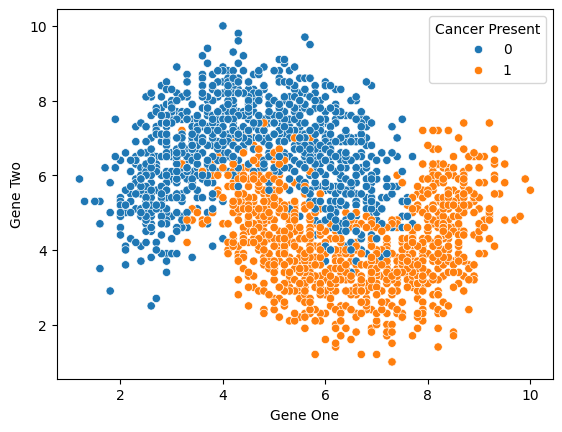

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=full_train)

Model Evaluation

In [ ]:
#find prediction value
from sklearn.metrics import accuracy_score
y_pred=knn_model.predict(scaled_x_test)
accuracy_score(y_test,y_pred)

0.9344444444444444